In [1]:
#imports
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
import gensim 
import logging
import pandas as pd

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [33]:
# Reading data from csv file 
df = pd.read_csv("PCD_tickets.csv")
pd.options.display.max_colwidth = 50
print(df.head(2))

C:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,2

      jiraId                                            summary  \
0  PCD-91395  ATB Survey_PCD-88414_Enter rating during a pos...   
1  PCD-91394  ATB Survey_PCD-88414_Enter rating during a pos...   

                                         description components issueType  \
0  Start Call->8005->SystemHangup Unmapped Variab...   CallFlow      Test   
1  Start Call->8005->8010->8020->8050-1 - DTMF->8...   CallFlow      Test   

                   project                      projectCategory Unnamed: 7  \
0  POD Customer Deployment  Operation - Application Development        NaN   
1  POD Customer Deployment  Operation - Application Development        NaN   

  Unnamed: 8 Unnamed: 9      ...      Unnamed: 1268 Unnamed: 1269  \
0        NaN        NaN      ...                NaN           NaN   
1        NaN        NaN      ...                NaN           NaN   

  Unnamed: 1270 Unnamed: 1271 Unnamed: 1272 Unnamed: 1273 Unnamed: 1274  \
0           NaN           NaN           NaN     

In [59]:
# some pre-processing and merging summary - description column
df = df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1)
print(list(df.columns.values))
df['summary'] = df['summary'].str.replace(',', '').str.replace('@', '').str.lower()
df['description'] = df['description'].str.replace(',', '').str.replace('@', '').str.lower()
df['summary_description'] = df['summary'].astype(str) + df['description']
print(df['summary_description'])

['jiraId', 'summary', 'description', 'components', 'issueType', 'project', 'projectCategory', 'data']
0        atb survey_pcd-88414_enter rating during a pos...
1        atb survey_pcd-88414_enter rating during a pos...
2        atb survey_pcd-88414_enter rating during a pos...
3        atb survey_pcd-88414_enter rating during a pos...
4        atb survey_pcd-88414_enter rating during a pos...
5        atb survey_pcd-88414_enter rating during a pos...
6        atb survey_pcd-88899_enter rating during a pos...
7        atb survey_pcd-88899_enter rating during a pos...
8        atb survey_pcd-88899_enter rating during a pos...
9        atb survey_pcd-88899_enter rating during a pos...
10       atb survey_pcd-88899_enter rating during a pos...
11       atb survey_pcd-88899_enter rating during a pos...
12       atb survey_pcd-88899_enter rating during a pos...
13       atb survey_pcd-88417_survey is to be sensitive...
14       atb survey_pcd-88417_survey is to be sensitive...
15       atb 

In [60]:
#tokenizing and puting to list
desc = df['summary_description']
def read_input(desc):
    for did,content in desc.iteritems():
#         print(content)
        if (did%10000==0):
            logging.info ("read {0} reviews".format (did))
        # do some pre-processing and return a list of words for each review text
        yield(gensim.utils.simple_preprocess(str(content).encode("utf-8")))

documents = list(read_input(desc))
logging.info ("Done reading data file")

print(documents[:100])

2018-06-26 14:24:24,227 : INFO : read 0 reviews
2018-06-26 14:24:25,318 : INFO : read 10000 reviews
2018-06-26 14:24:26,505 : INFO : read 20000 reviews
2018-06-26 14:24:27,753 : INFO : read 30000 reviews
2018-06-26 14:24:29,226 : INFO : read 40000 reviews
2018-06-26 14:24:30,542 : INFO : read 50000 reviews
2018-06-26 14:24:31,673 : INFO : read 60000 reviews
2018-06-26 14:24:32,596 : INFO : read 70000 reviews
2018-06-26 14:24:33,681 : INFO : read 80000 reviews
2018-06-26 14:24:34,291 : INFO : Done reading data file


[['atb', 'survey_pcd', 'rating', 'during', 'post', 'call', 'survey', 'using', 'dtmf', 'start', 'call', 'systemhangup', 'unmapped', 'variables'], ['atb', 'survey_pcd', 'rating', 'during', 'post', 'call', 'survey', 'using', 'dtmf', 'start', 'call', 'dtmf', 'true', 'dtmf', 'true', 'callerhangup', 'unmapped', 'variables', 'lastquestion', 'false', 'speechactive', 'false', 'questioncount', 'morequestions', 'true'], ['atb', 'survey_pcd', 'rating', 'during', 'post', 'call', 'survey', 'using', 'dtmf', 'start', 'call', 'dtmf', 'true', 'dtmf', 'true', 'callerhangup', 'unmapped', 'variables', 'lastquestion', 'false', 'speechactive', 'false', 'questioncount', 'morequestions', 'true'], ['atb', 'survey_pcd', 'rating', 'during', 'post', 'call', 'survey', 'using', 'dtmf', 'start', 'call', 'dtmf', 'true', 'dtmf', 'true', 'callerhangup', 'unmapped', 'variables', 'lastquestion', 'false', 'speechactive', 'false', 'questioncount', 'morequestions', 'true'], ['atb', 'survey_pcd', 'rating', 'during', 'post', '

In [61]:
#training the model using word2vec
model = gensim.models.Word2Vec (documents, size=150, window=10, min_count=2, workers=10)
model.train(documents,total_examples=len(documents),epochs=15)

2018-06-26 14:24:47,225 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2018-06-26 14:24:47,227 : INFO : collecting all words and their counts
2018-06-26 14:24:47,229 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-06-26 14:24:47,339 : INFO : PROGRESS: at sentence #10000, processed 576059 words, keeping 14736 word types
2018-06-26 14:24:47,439 : INFO : PROGRESS: at sentence #20000, processed 1171577 words, keeping 23280 word types
2018-06-26 14:24:47,532 : INFO : PROGRESS: at sentence #30000, processed 1739966 words, keeping 27097 word types
2018-06-26 14:24:47,666 : INFO : PROGRESS: at sentence #40000, processed 2551200 words, keeping 35412 word types
2018-06-26 14:24:47,778 : INFO : PROGRESS: at sentence #50000, processed 3236307 words, keeping 40164 word types
2018-06-26 14:24:47,879 : INFO : PROGRESS: at sentence #60000, processed 3811944 words, keeping 45954 word types
2018-06-26 14:24:47,957 : INFO : PROGRESS: at 

2018-06-26 14:25:02,464 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-06-26 14:25:02,465 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-06-26 14:25:02,465 : INFO : EPOCH - 5 : training on 5205003 raw words (4238929 effective words) took 2.8s, 1499599 effective words/s
2018-06-26 14:25:02,466 : INFO : training on a 26025015 raw words (21198024 effective words) took 13.7s, 1552867 effective words/s
2018-06-26 14:25:02,469 : WARNING : Effective 'alpha' higher than previous training cycles
2018-06-26 14:25:02,469 : INFO : training model with 10 workers on 34081 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2018-06-26 14:25:03,481 : INFO : EPOCH 1 - PROGRESS: at 36.85% examples, 1529503 words/s, in_qsize 19, out_qsize 0
2018-06-26 14:25:04,486 : INFO : EPOCH 1 - PROGRESS: at 72.93% examples, 1567641 words/s, in_qsize 20, out_qsize 0
2018-06-26 14:25:05,138 : INFO : worker thread finished; awaiting finish of 

2018-06-26 14:25:19,448 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-06-26 14:25:19,450 : INFO : EPOCH - 6 : training on 5205003 raw words (4238884 effective words) took 3.1s, 1380414 effective words/s
2018-06-26 14:25:20,465 : INFO : EPOCH 7 - PROGRESS: at 31.06% examples, 1233695 words/s, in_qsize 17, out_qsize 2
2018-06-26 14:25:21,472 : INFO : EPOCH 7 - PROGRESS: at 59.47% examples, 1306130 words/s, in_qsize 19, out_qsize 1
2018-06-26 14:25:22,473 : INFO : EPOCH 7 - PROGRESS: at 96.12% examples, 1353111 words/s, in_qsize 18, out_qsize 1
2018-06-26 14:25:22,527 : INFO : worker thread finished; awaiting finish of 9 more threads
2018-06-26 14:25:22,539 : INFO : worker thread finished; awaiting finish of 8 more threads
2018-06-26 14:25:22,543 : INFO : worker thread finished; awaiting finish of 7 more threads
2018-06-26 14:25:22,545 : INFO : worker thread finished; awaiting finish of 6 more threads
2018-06-26 14:25:22,552 : INFO : worker thread finished; await

(42394977, 52050030)

In [89]:
#testing the model
w1 = "sipfs"
model.wv.most_similar (positive=w1)

[('ss_ezpulse', 0.4819487929344177),
 ('sip_b', 0.4459376633167267),
 ('ss_ezpulse_b', 0.4412688612937927),
 ('startup', 0.42929139733314514),
 ('tserver', 0.4199005663394928),
 ('restart', 0.4175601601600647),
 ('wfm_server_euw', 0.40447795391082764),
 ('vms', 0.402971088886261),
 ('cme', 0.3999616503715515),
 ('applications', 0.39679551124572754)]

In [65]:
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# # access vector for one word
# print(model['sentence'])


# # save model
# model.save('model.bin')
# # load model
# new_model = Word2Vec.load('model.bin')
# print(new_model)

Word2Vec(vocab=34081, size=150, alpha=0.025)
['atb', 'survey_pcd', 'rating', 'during', 'post', 'call', 'survey', 'using', 'dtmf', 'start', 'systemhangup', 'unmapped', 'variables', 'true', 'callerhangup', 'lastquestion', 'false', 'speechactive', 'questioncount', 'morequestions', 'speech', 'is', 'to', 'be', 'sensitive', 'no', 'input', 'and', 'perform', 'retry', 'match', 'provident', 'bank', 'psqa', 'main', 'ivr', 'application', 'throws', 'system', 'error', 'for', 'first', 'at', 'menu', 'steps', 'hear', 'enter', 'tin', 'get', 'pin', 'press', 'option', 'account', 'type', 'dynamic', 'consumer', 'loan', 'message', 'don', 'give', 'any', 'or', 'invalid', 'actual', 'result', 'expected', 'should', 'play', 'sorry', 'didn', 'that', 'followed', 'by', 'second', 'it', 'still', 'the', 'third', 'entry', 'go', 'emergnecy', 'check', 'route', 'agent', 'as', 'bh', 'set', 'open', 'emergency', 'flag', 'test', 'details', 'ni', 'timestamp', 'connectionid', 'dda', 'nm', 'on', 'pressing', 'select', 'acct', 'vari

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


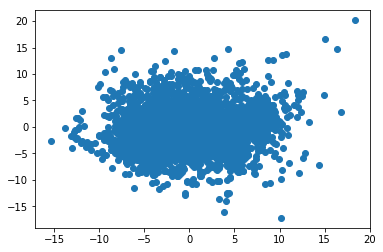

In [71]:
#Plot Word Vectors Using PCA
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from sklearn.decomposition import PCA
from matplotlib import*

pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.scatter(result[:, 0], result[:, 1])

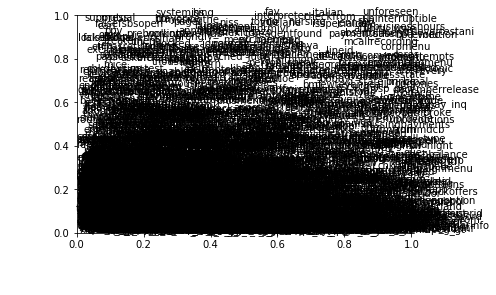

In [76]:
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
    
#pyplot.show()

In [77]:
from sklearn.manifold import TSNE
vocab = list(model.wv.vocab)
X = model[vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

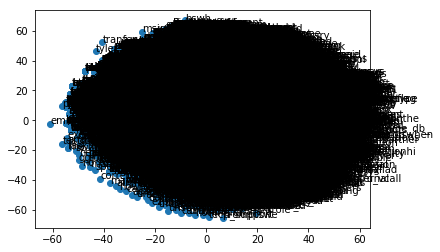

In [78]:
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])
fig = pyplot.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])
for word, pos in df.iterrows():
    ax.annotate(word, pos)

In [ ]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=250, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    pyplot.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        pyplot.scatter(x[i],y[i])
        pyplot.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    pyplot.show()


In [ ]:
tsne_plot(model)

In [ ]:
import pickle

trained_data = model.wv.vocab

with open('word_embedding.pickle', 'wb') as handle:
    pickle.dump(trained_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import scipy
import pickle
from gensim import models

%matplotlib inline
import tensorflow.contrib.slim as slim
import tensorflow.contrib.slim.nets as nets
import tensorflow as tf
from tensorflow.contrib.tensorboard.plugins import projector
tf.__version__

In [ ]:
with open('word_emb.pickle', 'rb') as handle:
    model = pickle.load(handle)
labels = []
tokens = []

for word in model:
    tokens.append(model[word])
    labels.append(word)

print(labels)